In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sn


In [40]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y
    
    def evaluate(self, X_test, Y_test):
        self.X_test = X_test
        self.Y_test = Y_test
        y_predict=np.zeros(len(self.X_test))
        for i, test in enumerate(self.X_test):
            y_predict[i] = self.predict(test)
        evaluatation = (y_predict == self.Y_test).sum()/len(self.Y_test)
        return evaluatation, y_predict

In [41]:
iris = load_iris()

In [42]:
X = iris['data']
Y = iris['target']

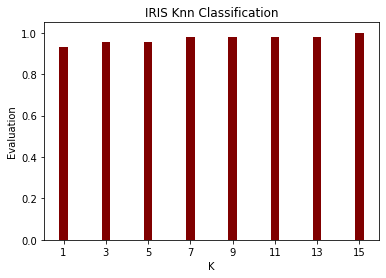

In [43]:
eval = []
for K in range(1, 17, 2):
    knn = KNearestNeighbors(k=K)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
    knn.fit(X_train,Y_train)
    evaluation, prediction = knn.evaluate(X_test, Y_test)
    eval.append(evaluation)

plt.bar(np.arange(1,17,2), eval, color ='maroon', width = 0.4)

plt.xlabel("K")
plt.ylabel("Evaluation")
plt.title("IRIS Knn Classification")
plt.xticks(np.arange(1,17,2))
plt.show()

1.0


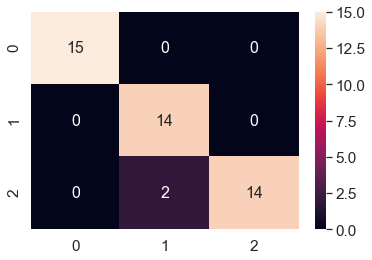

In [76]:
knn = KNearestNeighbors(k=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
knn.fit(X_train,Y_train)
evaluation, y_predic = knn.evaluate(X_test, Y_test)
Setosa_Setosa =0
Setosa_Versicolour =0
Setosa_Virginica =0
Versicolour_Setosa = 0
Versicolour_Versicolour = 0
Versicolour_Virginica = 0
Virginica_Setosa = 0
Virginica_Versicolour = 0
Virginica_Virginica = 0
print (y_predic[5])
for i, item in enumerate(y_predic):
    if y_predic[i] == 0 and Y_test[i] == 0:
        Setosa_Setosa += 1
    if y_predic[i] == 1 and Y_test[i] == 1:
        Versicolour_Versicolour += 1
    if y_predic[i] == 2 and Y_test[i] == 2:
        Virginica_Virginica += 1
    if y_predic[i] == 0 and Y_test[i] == 1:
        Setosa_Versicolour += 1
    if y_predic[i] == 0 and Y_test[i] == 2:
        Setosa_Virginica += 1
    if y_predic[i] == 1 and Y_test[i] == 0:
        Versicolour_Setosa += 1
    if y_predic[i] == 1 and Y_test[i] == 2:
        Versicolour_Virginica += 1
    if y_predic[i] == 2 and Y_test[i] == 0:
        Virginica_Setosa += 1
    if y_predic[i] == 2 and Y_test[i] == 1:
        Virginica_Versicolour += 1
array = np.array([[Setosa_Setosa,Setosa_Versicolour,Setosa_Virginica],
         [Versicolour_Setosa,Versicolour_Versicolour,Versicolour_Virginica],
         [Virginica_Setosa,Virginica_Versicolour,Virginica_Virginica]])

df_cm = pd.DataFrame(array, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

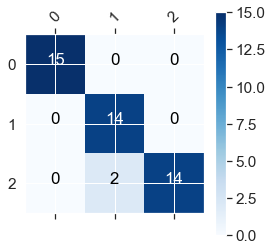

In [100]:
import itertools
classes = ['Setosa', 'Versicolour', '']
plt.matshow(array, cmap=plt.cm.Blues, interpolation='nearest')
for i, j in itertools.product(range(array.shape[0]), range(array.shape[1])):
        plt.text(j, i, array[i, j],
                 horizontalalignment="center",
                 color="white" if array[i, j] > 10 else "black")
plt.colorbar()
plt.ylabel(df_cm.index.name)
plt.xlabel(df_cm.columns.name)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.show()

In [78]:
from sklearn.neighbors import KNeighborsClassifier

eval2=[]
for K in range(1, 17, 2):
    knc=KNeighborsClassifier(n_neighbors=K)
    knc.fit(X_train,Y_train)
    prediction=knc.predict(X_test)
    evaluatation = (prediction == Y_test).sum()/len(Y_test)
    eval2.append(evaluatation)

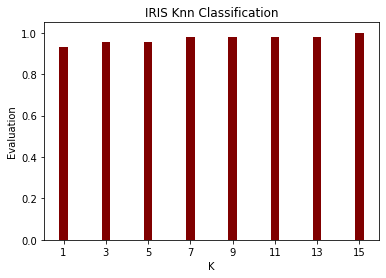

In [26]:
plt.bar(np.arange(1,17,2), eval2, color ='maroon', width = 0.4)

plt.xlabel("K")
plt.ylabel("Evaluation")
plt.title("IRIS Knn Classification")
plt.xticks(np.arange(1,17,2))
plt.show()